#**Machine Learning Process Report: Classificstion problems: Airline Passenger Satisfaction**

#**1. Reading the data into python and data description**




The data has two in file "archive.zip". Extract the zip, then get the file "test.csv" and "train.csv"

You can download the data required for this project here:

https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction

Data description
The meaning of each column in the data is as below:

| No. | Feature                               | Description                                                         |
|-----|---------------------------------------|---------------------------------------------------------------------|
| 0   | Gender                                | Gender of the passengers                                            |
| 1   | Customer Type                         | The customer type                                                   |
| 2   | Age                                   | The actual age of the passengers                                    |
| 3   | Type of Travel                        | Purpose of the flight of the passengers                             |
| 4   | Class                                 | Travel class in the plane of the passengers                         |
| 5   | Flight distance                       | The flight distance of this journey                                 |
| 6   | Inflight wifi service                 | Satisfaction level of the inflight wifi service (0:Not Applicable;1-5) |
| 7   | Departure/Arrival time convenient     | Satisfaction level of Departure/Arrival time convenient             |
| 8   | Ease of Online booking                | Satisfaction level of online booking                                |
| 9   | Gate location                         | Satisfaction level of Gate location                                 |
| 10  | Food and drink                        | Satisfaction level of Food and drink                                |
| 11  | Online boarding                       | Satisfaction level of online boarding                               |
| 12  | Seat comfort                          | Satisfaction level of Seat comfort                                  |
| 13  | Inflight entertainment                | Satisfaction level of inflight entertainment                        |
| 14  | On-board service                      | Satisfaction level of On-board service                              |
| 15  | Leg room service                      | Satisfaction level of Leg room service                              |
| 16  | Baggage handling                      | Satisfaction level of baggage handling                              |
| 17  | Check-in service                      | Satisfaction level of Check-in service                              |
| 18  | Inflight service                      | Satisfaction level of inflight service                              |
| 19  | Cleanliness                           | Satisfaction level of Cleanliness                                   |
| 20  | Departure Delay in Minutes            | Minutes delayed when departure                                      |
| 21  | Arrival Delay in Minutes              | Minutes delayed when Arrival                                        |
| 22  | Satisfaction                          | Airline satisfaction level                                          |

In [ ]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# import pandas as pd

# AirlineData1 = pd.read_csv("train.csv")
# AirlineData2 = pd.read_csv("test.csv")
# AirlineData = pd.concat([AirlineData1, AirlineData2], ignore_index=True)

# print('Shape before deleting duplicate values:', AirlineData.shape)
# AirlineData = AirlineData.drop_duplicates()
# print('Shape After deleting duplicate values:', AirlineData.shape)
# AirlineData

In [ ]:
import pandas as pd

#read dataset from Gihub url
github_url1 = 'https://raw.githubusercontent.com/IAmPaRzivALz/FRA503_-Dataset/636eedc4f79060f46203ec6cac3852bedf02cbfd/train.csv'
github_url2 = 'https://raw.githubusercontent.com/IAmPaRzivALz/FRA503_-Dataset/636eedc4f79060f46203ec6cac3852bedf02cbfd/test.csv'
AirlineData1 = pd.read_csv(github_url1, encoding='utf-8')
AirlineData2 = pd.read_csv(github_url2, encoding='utf-8')

#concatenate rows from the second dataset to the first dataset
AirlineData = pd.concat([AirlineData1, AirlineData2], ignore_index=True)
print('Shape before deleting duplicate values:', AirlineData.shape)
#drop duplicate instance
AirlineData = AirlineData.drop_duplicates()
print('Shape After deleting duplicate values:', AirlineData.shape)
AirlineData

Shape before deleting duplicate values: (129880, 25)
Shape After deleting duplicate values: (129880, 25)


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
129876,25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
129877,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
129878,25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


#**2. Defining the problem statement**

The goal is to learn from this data and predict if a passenger is satisfied with the airline.

Create a Predictive model which can tell whether a passenger is satisfied with the airline or not?

* **Target Variable:** satisfaction
* **Predictors:** Gender, Customer Type, Age, Type of Travel, Class, Flight distance, Inflight wifi service, Departure/Arrival time convenient, Ease of Online booking, Gate location, Food and drink, Online boarding, Seat comfort, Inflight entertainment, On-board service, Leg room service, Baggage handling, Check-in service, nflight service, Cleanliness, Departure Delay in Minutes, Arrival Delay in Minutes etc.

  * satisfied means passenger is satisfied with the airline.
  * neutral or dissatisfied means passenger is unsatisfied with the airline.

* **Instance:**  Passenger of the airline.

**Determining the type of Machine Learning**

Based on the problem statement, we need to create a supervised ML classification model which the target variable is categorical.

#**3. Looking at the distribution of Target**



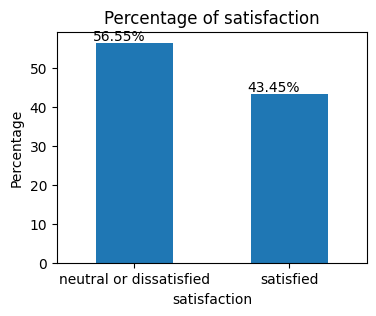

In [ ]:
import matplotlib.pyplot as plt

#Group by 'satisfaction' and calculate the size of each group
GroupedData = AirlineData.groupby('satisfaction').size()
# Calculate the percentage of each category
percentage_data = (GroupedData / GroupedData.sum()) * 100

#Plot the bar chart with percentages
ax = percentage_data.plot(kind='bar', figsize=(4, 3), rot=0)
plt.title('Percentage of satisfaction')
plt.xlabel('satisfaction')
plt.ylabel('Percentage')

#Annotate each bar with the percentage value
for bar, percentage in zip(ax.patches, percentage_data):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.5, f'{percentage:.2f}%', ha='center')

plt.show()

The Target variable distribution looks balanced. There are enough number of rows for satisfied as well neutral or dissatisfied for the ML algorithms to learn.

#**4. Basic data exploration**



In [ ]:
#Looking at sample rows in the data
AirlineData.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


From point of view of domain's knowledge, attribute named "Gender" seems not relate to target. But, we not sure.
* **Gender:** Selected(**Doubt**)

'Unnamed: 0' is not related to the information in this dataset, it simply indicates the index of instances in the dataset.And 'id' is just individual passenger id.So, both attributes doesn't affect passenger satisfaction.

In [ ]:
del AirlineData['Unnamed: 0']
del AirlineData['id']

info() : This provides the summarized information of the data, including Non-Null Count, data types etc.

In [ ]:
AirlineData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Inflight wifi service              129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Ease of Online booking             129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Food and drink                     129880 non-null  int64  
 11  Online boarding                    1298

From info, we see attribute named 'Arrival Delay in Minutes' has missing value. So, those rows must be removed

In [ ]:
import pandas as pd
# Drop rows with missing values in the attribute 'Arrival Delay in Minutes'
AirlineData = AirlineData.dropna(subset=['Arrival Delay in Minutes'])
# Reset the index after dropping rows
AirlineData = AirlineData.reset_index(drop=True)

In [ ]:
AirlineData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129487 entries, 0 to 129486
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129487 non-null  object 
 1   Customer Type                      129487 non-null  object 
 2   Age                                129487 non-null  int64  
 3   Type of Travel                     129487 non-null  object 
 4   Class                              129487 non-null  object 
 5   Flight Distance                    129487 non-null  int64  
 6   Inflight wifi service              129487 non-null  int64  
 7   Departure/Arrival time convenient  129487 non-null  int64  
 8   Ease of Online booking             129487 non-null  int64  
 9   Gate location                      129487 non-null  int64  
 10  Food and drink                     129487 non-null  int64  
 11  Online boarding                    1294

Display unique value of each attribute.

In [ ]:
from prettytable import PrettyTable

print("Unique values in each column")
print("------------------------------")

#Create a PrettyTable object
table = PrettyTable()
table.field_names = ["Column Name", "Unique Values"]

#Iterate over each column
for column in AirlineData.columns:
    unique_values = AirlineData[column].unique()
    table.add_row([column, unique_values])
print(table)

Unique values in each column
------------------------------
+-----------------------------------+--------------------------------------------------------------------------+
|            Column Name            |                              Unique Values                               |
+-----------------------------------+--------------------------------------------------------------------------+
|               Gender              |                            ['Male' 'Female']                             |
|           Customer Type           |                  ['Loyal Customer' 'disloyal Customer']                  |
|                Age                | [13 25 26 61 47 52 41 20 24 12 53 33 45 38  9 17 43 58 23 57 49 36 22 31 |
|                                   |  15 35 67 37 40 34 39 50 29 54 21 28 27 69 60 48 59 46 30 66 64 44 51 32 |
|                                   |  19 42 16 11 62  8 56 68 55 18 65 72 70 63 10  7 14 80 74 71 85 73 76 77 |
|                                   

**Data type exploration results**

| No. | Feature                               | Type          | Measurement   |
|-----|---------------------------------------|---------------|---------------|
| 0   | Gender                                | Qualitative   | Nominal       |
| 1   | Customer Type                         | Qualitative   | Nominal       |
| 2   | Age                                   | **Quantitative**  | **Continuous**    |
| 3   | Type of Travel                        | Qualitative   | Nominal       |
| 4   | Class                                 | Qualitative   | Nominal       |
| 5   | Flight distance                       | **Quantitative**   | **Continuous**       |
| 6   | Inflight wifi service                 | Qualitative   | Ordinal       |
| 7   | Departure/Arrival time convenient     | Qualitative   | Ordinal       |
| 8   | Ease of Online booking                | Qualitative   | Ordinal       |
| 9   | Gate location                         | Qualitative  | Ordinal    |
| 10  | Food and drink                        | Qualitative  | Ordinal    |
| 11  | Online boarding                       | Qualitative   | Ordinal       |
| 12  | Seat comfort                          | Qualitative   | Ordinal    |
| 13  | Inflight entertainment                | Qualitative   | Ordinal    |
| 14  | On-board service                      | Qualitative   | Ordinal       |
| 15  | Leg room service                      | Qualitative   | Ordinal       |
| 16  | Baggage handling                      | Qualitative   | Ordinal       |
| 17  | Check-in service                      | Qualitative  | Ordinal    |
| 18  | Inflight service                      | Qualitative  | Ordinal    |
| 19  | Cleanliness                           | Qualitative  | Ordinal    |
| 20  | Departure Delay in Minutes            | **Quantitative**  | **Continuous**    |
| 21  | Arrival Delay in Minutes              | **Quantitative**   | **Continuous**       |
| 22  | Satisfaction                          | Qualitative   | Nominal       |

###**Summary:** There are 19 Qualitative(5 nominal and 14 ordinal) and 4 Quantitative(4 continuous).

# **5.Exploration for data distribution and feature selection based on data distribution**


## **5.1. Visualize distribution of all the Categorical Predictor variables in the data using bar plots**

Based on the Basic Data Exploration above, we have spotted 18 categorical predictors in the data

**Categorical Predictors:**

"Gender",
"Customer Type",
"Type of Travel",
"Class",
"Inflight wifi service",
"Departure/Arrival time convenient",
"Ease of Online booking",
"Gate location",
"Food and drink",
"Online boarding",
"Seat comfort",
"Inflight entertainment",
"On-board service",
"Leg room service",
"Baggage handling",
"Checkin service",
"Inflight service" and
"Cleanliness"

We use bar charts to see how the data is distributed for these categorical columns.

In [ ]:
def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    import matplotlib.pyplot as plt
    import numpy as np

    #Calculate the number of rows
    n_rows = len(colsToPlot) // 2 + len(colsToPlot) % 2

    #Generate subplots in a grid with 2 columns
    fig, subPlots = plt.subplots(nrows=n_rows, ncols=2, figsize=(15, 6 * n_rows))
    #fig.suptitle('Bar charts of: Categorical Predictors')

    subPlots = np.ravel(subPlots)

    for colName, subplot in zip(colsToPlot, subPlots):
        inpData[colName].value_counts().plot(kind='bar', ax=subplot)
        subplot.set_title(colName)

    plt.tight_layout()
    plt.show()

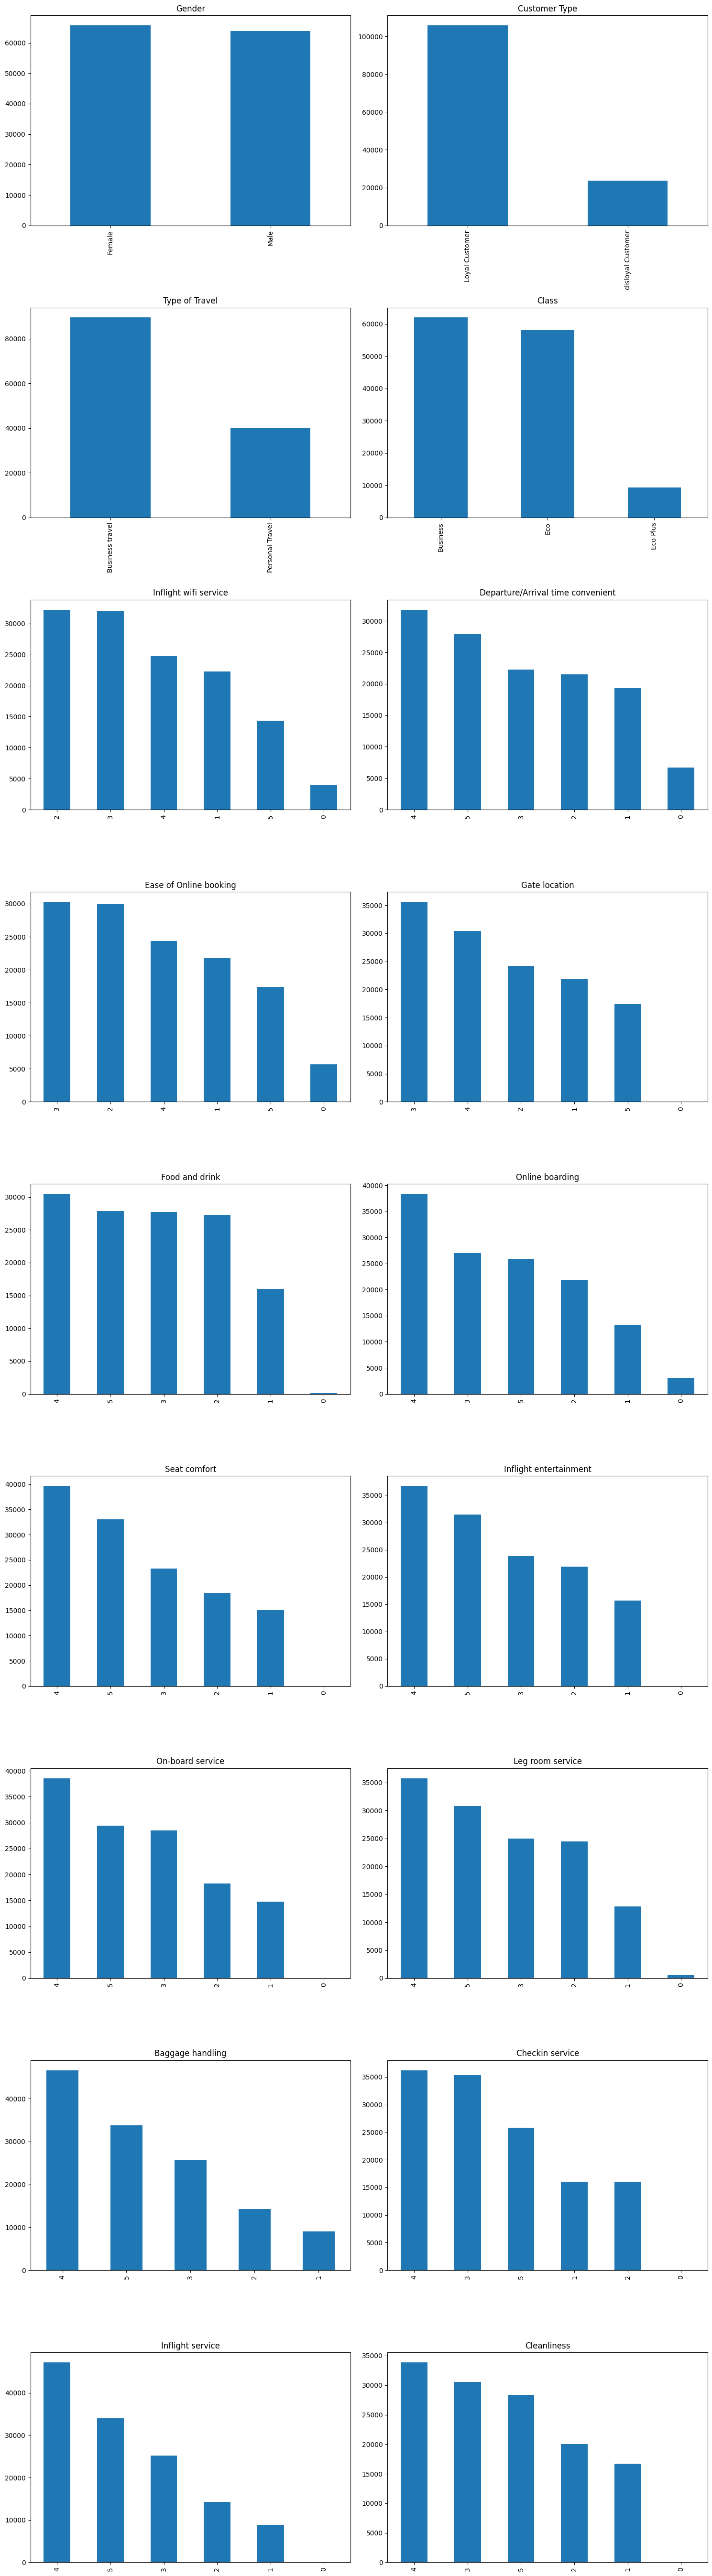

In [ ]:
PlotBarCharts(inpData=AirlineData, colsToPlot=["Gender",
                                                "Customer Type",
                                                "Type of Travel",
                                                "Class",
                                                "Inflight wifi service",
                                                "Departure/Arrival time convenient",
                                                "Ease of Online booking",
                                                "Gate location",
                                                "Food and drink",
                                                "Online boarding",
                                                "Seat comfort",
                                                "Inflight entertainment",
                                                "On-board service",
                                                "Leg room service",
                                                "Baggage handling",
                                                "Checkin service",
                                                "Inflight service",
                                                "Cleanliness"])

### **Bar Charts Interpretation**

**Interpretation**
In this data, Every catagorical attributes are right-skewed except 'Gender'. Causing bias in the model traning. So, we doubt these attributes.

**Selected Categorical Variables:** Both the categorical variables are selected for further analysis.
* **Gender:** Selected
* **Customer Type:** Selected(**Doubt**)
* **Type of Travel:** Selected(**Doubt**)
* **Class:** Selected(**Doubt**)
* **Inflight wifi service:** Selected(**Doubt**)
* **Departure/Arrival time convenient:** Selected(**Doubt**)
* **Ease of Online booking:** Selected(**Doubt**)
* **Gate location:** Selected(**Doubt**)
* **Food and drink:** Selected(**Doubt**)
* **Online boarding:** Selected(**Doubt**)
* **Seat comfort:** Selected(**Doubt**)
* **Inflight entertainment:** Selected(**Doubt**)
* **On-board service:** Selected(**Doubt**)
* **Leg room service:** Selected(**Doubt**)
* **Baggage handling:** Selected(**Doubt**)
* **Checkin service:** Selected(**Doubt**)
* **Inflight service:** Selected(**Doubt**)
* **Cleanliness:** Selected(**Doubt**)

## **5.2. Visualize distribution of all the Continuous Predictor variables in the data using histograms**

Based on the Basic Data Exploration, 4 continuous predictor variables were found "Age", "Flight Distance", "Departure Delay in Minutes" and "Arrival Delay in Minutes"

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Flight Distance'}>]], dtype=object)

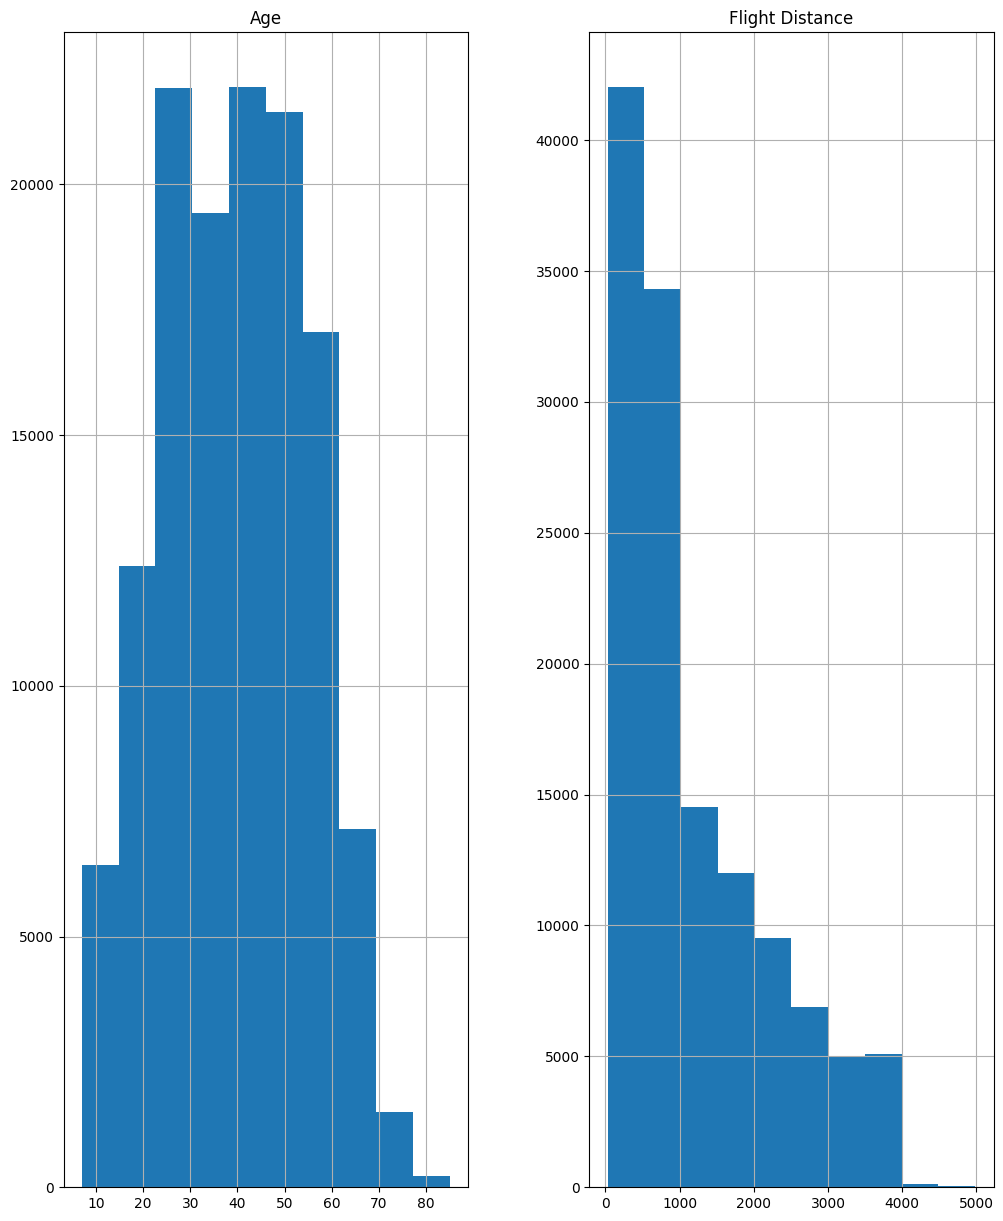

In [ ]:
#Create histograms for the "Age" and "Flight Distance"
AirlineData.hist(["Age",
                  "Flight Distance"],
                 figsize=(12,15))

The maximum values for 'Departure Delay in Minutes' and 'Arrival Delay in Minutes' are 1892 and 1584, respectively. To visualize this data, we plot a histogram graph with the x-axis ranging from 0 to 1600.

array([[<Axes: title={'center': 'Departure Delay in Minutes'}>,
        <Axes: title={'center': 'Arrival Delay in Minutes'}>]],
      dtype=object)

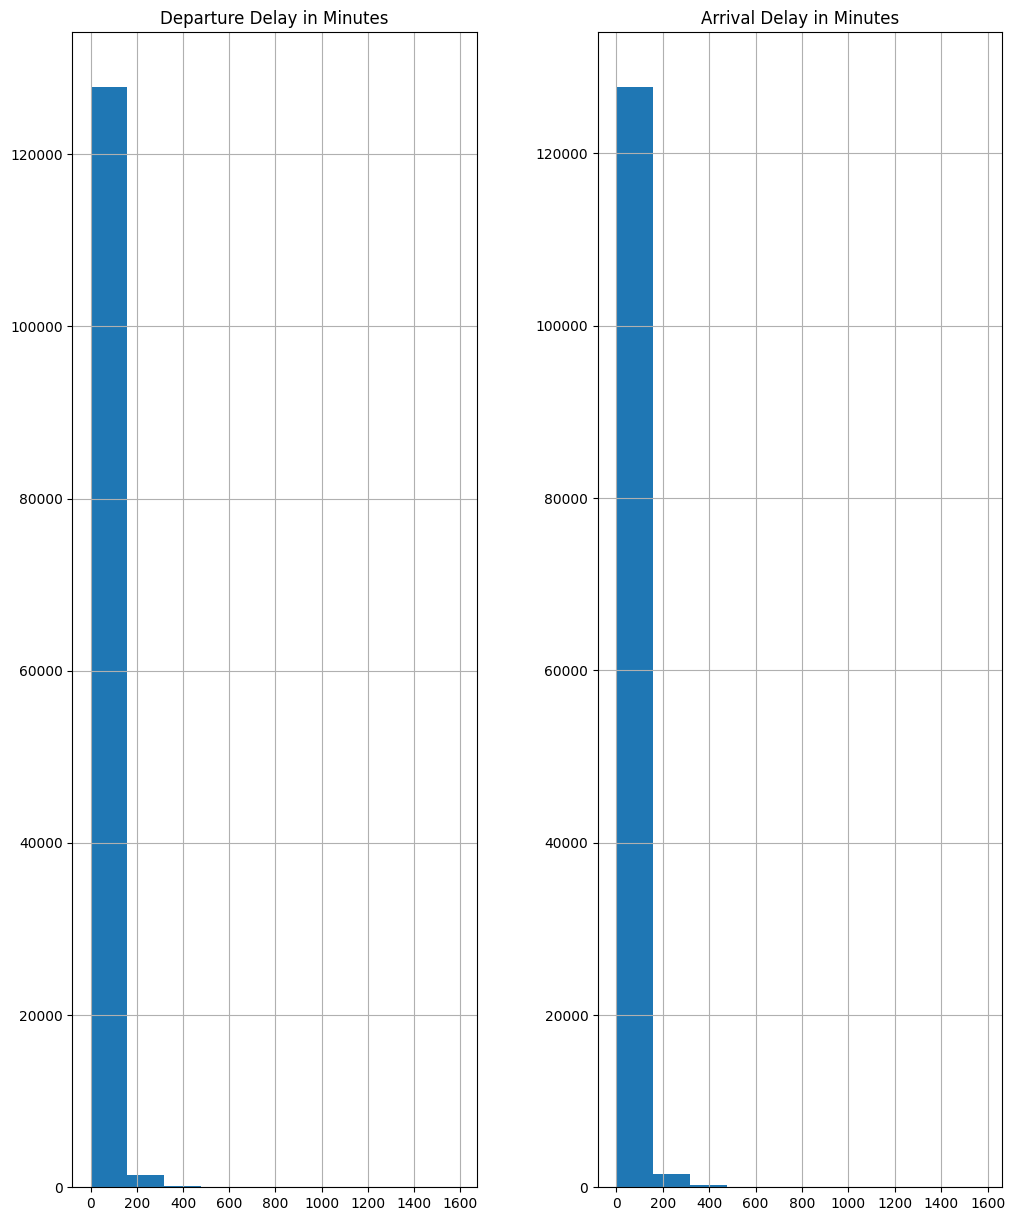

In [ ]:
# Plotting histograms of multiple columns together
AirlineData.hist(["Departure Delay in Minutes",
                  "Arrival Delay in Minutes"],
                figsize=(12,15))

Since the graph above, do not show the distribution cleary. So, we choose to visualize in range of 0 to 50

In [ ]:
#Plotting histogram with 20% of 'Depature Dalay in Minutes' and 'Arrival Dalah in Minutes'
range_values = (0, 50)
AirlineData[["Departure Delay in Minutes", "Arrival Delay in Minutes"]].hist(figsize=(12, 650), bins=50, range=range_values)
plt.suptitle("Histograms of Departure and Arrival Delays (Range: 0-0.5)")
plt.show()

### **Histogram Interpretation**

In this data, 'Age' is normal distribution, but 'Flight distance', 'Departure Delay in Minutes' and 'Arrival Delay in Minutes' are right-skewed.

**Selected Continuous Variables:**
* **Age:** Selected. Normal distribution, acceptable.
* **Flight Distance:** Selected. Slightly positve skewed distribution, acceptable.
* **Departure Delay in Minutes:** Selected. Extremely positive skewed distribution.(**Doubt**)
* **Arrival Delay in Minutes:** Selected. Extremely positive skewed distribution.(**Doubt**)


# **6. Outlier treatment**



In this data continuous predictors had outliers, hence treatment is required.

Upper IQR: 3739.0
Number of data in flight distance > 3739: 2847
2.1986763149968724 %


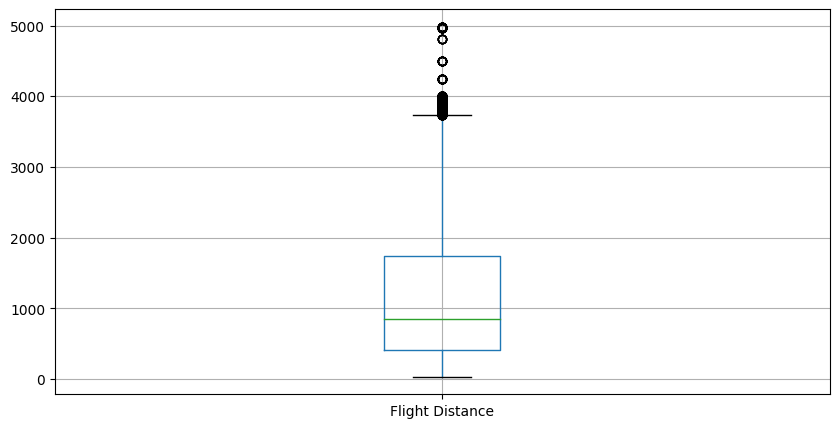

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

#Create a boxplot for the "Flight Distance"
AirlineData.boxplot(["Flight Distance"], figsize=(10,5))
print("Upper IQR:", AirlineData["Flight Distance"].quantile(0.75) + (1.5 * (AirlineData["Flight Distance"].quantile(0.75) - AirlineData["Flight Distance"].quantile(0.25))))
print("Number of data in flight distance > 3739:", AirlineData[AirlineData["Flight Distance"] > 3739].shape[0])
print(AirlineData[AirlineData["Flight Distance"] > 3739].shape[0] / AirlineData.shape[0] * 100,"%")

Upper IQR: 30.0
Number of data in Departure Delay in Minutes > 30: 17970
13.87784101878953 %


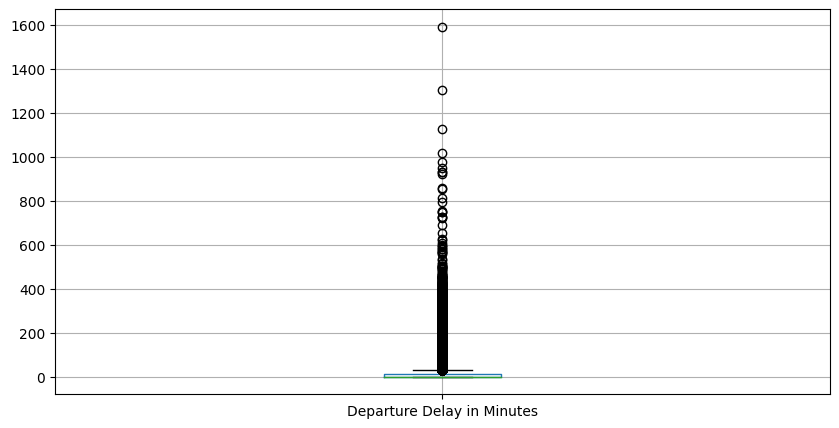

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

#Create a boxplot for the "Departure Delay in Minutes"
AirlineData.boxplot(["Departure Delay in Minutes"], figsize=(10,5))
print("Upper IQR:", AirlineData["Departure Delay in Minutes"].quantile(0.75) + (1.5 * (AirlineData["Departure Delay in Minutes"].quantile(0.75) - AirlineData["Departure Delay in Minutes"].quantile(0.25))))
print("Number of data in Departure Delay in Minutes > 30:", AirlineData[AirlineData["Departure Delay in Minutes"] > 30].shape[0])
print(AirlineData[AirlineData["Departure Delay in Minutes"] > 30].shape[0] / AirlineData.shape[0] * 100,"%")

Upper IQR: 32.5
Number of data in Arrival Delay in Minutes > 32.5: 17492
14.190613729563587 %


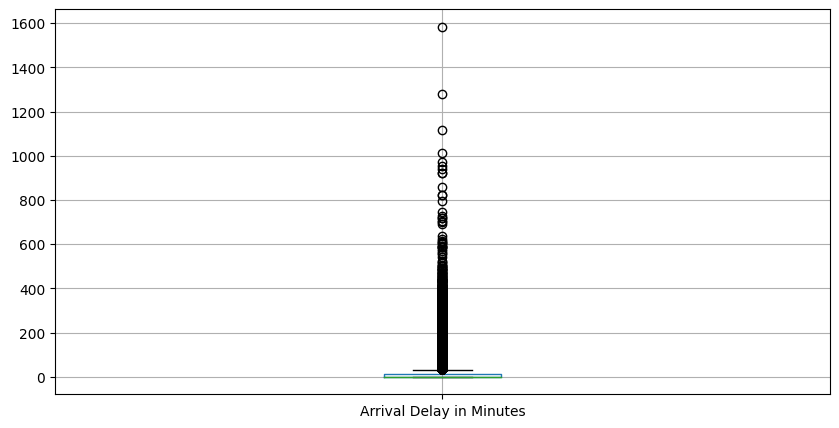

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

#Create a boxplot for the "Arrival Delay in Minutes" column
AirlineData.boxplot(["Arrival Delay in Minutes"], figsize=(10,5))
print("Upper IQR:", AirlineData["Arrival Delay in Minutes"].quantile(0.75) + (1.5 * (AirlineData["Arrival Delay in Minutes"].quantile(0.75) - AirlineData["Arrival Delay in Minutes"].quantile(0.25))))
print("Number of data in Arrival Delay in Minutes > 32.5:", AirlineData[AirlineData["Arrival Delay in Minutes"] > 32.5].shape[0])
print(AirlineData[AirlineData["Arrival Delay in Minutes"] > 30].shape[0] / AirlineData.shape[0] * 100,"%")

### **Interpretation**
1.From domain's point of view ,it is normal having **flight distance** more than 3739 Km.
There is about 2.2% of data that might considered as outlier which too less to effect the model efficientcy.

2.From domain's point of view ,it is normal having **departure delay** more than 30 minuite. There is about 13.9% of data that might considered as outier which is quite much. I might effect the efficientcy of the model so we might consider cutting thes outlier if the performance is not good enough.

3.From domain's point of view ,it is normal having **arrival delay** more than 32.5 minuite. There is about 14.2% of data that might considered as outier which is quite much. I might effect the efficientcy of the model so we might consider cutting thes outlier if the performance is not good enough.

# **7. Missing values treatment**



In [ ]:
# Finding how many missing values are there for each column
AirlineData.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

No missing values in this data!!

# **8. Feature selection by Visual correlation analysis and Statistical measurement**



## **8.1 Relationship exploration: Categorical Vs Continuous -- Box Plots and Pair Plot (In case target variable is Categorical and all predictor variable is Continuous)**





### **8.1.1 Visual exploration**

When the target variable is Categorical and the predictor variable is Continuous we analyze the relation using boxplots and pairplot.

satisfaction
neutral or dissatisfied    37.0
satisfied                  43.0
Name: Age, dtype: float64
satisfaction
neutral or dissatisfied     674.0
satisfied                  1249.0
Name: Flight Distance, dtype: float64
satisfaction
neutral or dissatisfied    0.0
satisfied                  0.0
Name: Departure Delay in Minutes, dtype: float64
satisfaction
neutral or dissatisfied    0.0
satisfied                  0.0
Name: Arrival Delay in Minutes, dtype: float64


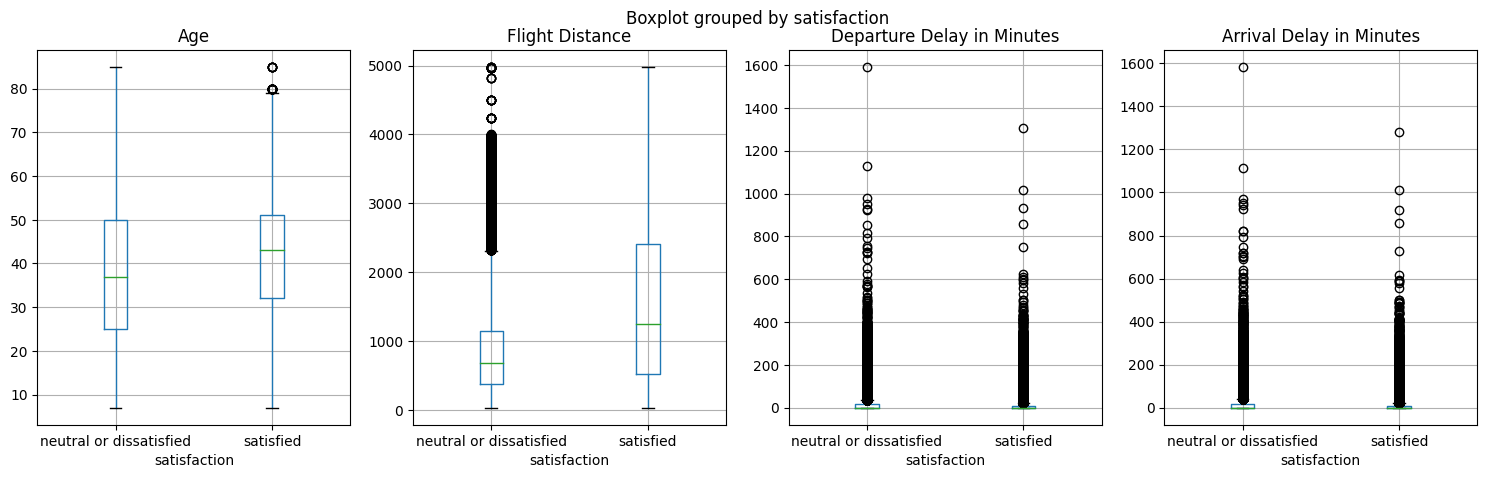

In [ ]:
#Box plots
import matplotlib.pyplot as plt

#continuous predictor variables
ContinuousColsList=["Age",
                  "Flight Distance",
                  "Departure Delay in Minutes",
                  "Arrival Delay in Minutes"
                   ]

#Create subplots
fig, PlotCanvas = plt.subplots(nrows=1, ncols=len(ContinuousColsList), figsize=(18,5))

#Create box plots
for PredictorCol, i in zip(ContinuousColsList, range(len(ContinuousColsList))):
    AirlineData.boxplot(column=PredictorCol, by='satisfaction', figsize=(5,5), vert=True, ax=PlotCanvas[i])

#Print the median value for each continuous predictor variable grouped by "satisfaction"
print(AirlineData.groupby(['satisfaction'])["Age"].median())
print(AirlineData.groupby(['satisfaction'])["Flight Distance"].median())
print(AirlineData.groupby(['satisfaction'])["Departure Delay in Minutes"].median())
print(AirlineData.groupby(['satisfaction'])["Arrival Delay in Minutes"].median())


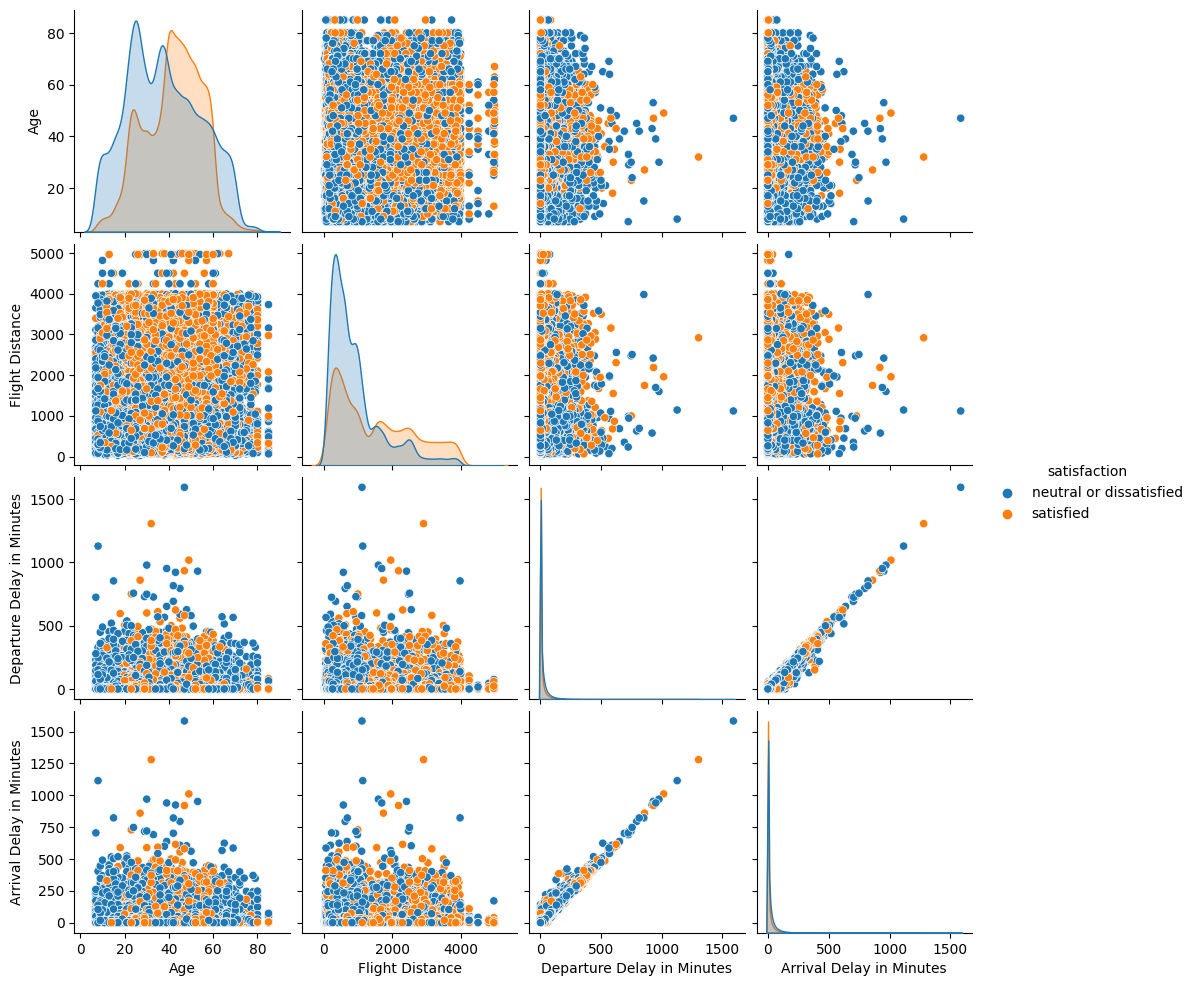

In [ ]:
#Pair plot
import seaborn as sns

#columns for the pairplot
columns_for_pairplot = ["Age",
                  "Flight Distance",
                  "Departure Delay in Minutes",
                  "Arrival Delay in Minutes",
                  "satisfaction"
                ]

#Create a DataFrame with selected columns
df = AirlineData[columns_for_pairplot]
#Create a pairplot
sns.pairplot(df, hue="satisfaction")

####**Scatter charts interpretation**
**Interpretation**
In this data, look at the 'Age' Vs 'satisfaction' and 'Flight Distance' Vs 'satisfaction'. These two charts has different median! Passengers who is satisfied has more Age as compared to passengers who is unsatisfied. So, these columns are correlated with the satisfaction column. But other two charts has same median which can not use seperate target class. So, we doubt these attributes.

In pairplot case, 'Age' and 'Flight Distance' can clearly seperate satisfaction's target characteristics but 'Departure Delay in Minutes' and 'Arrival Delay in Minutes' can not clearly seperate satisfaction's target characteristics

**Selected Continuous Variables:**

* **Age:** Selected. The boxes are NOT in the same line. 'satisfaction' will appear in 'Age' around 43 and 'neutral or dissatisfied' will appear in Time_Spent around 37.
* **Flight Distance:** Selected. The boxes are NOT in the same line. 'satisfaction' will appear in 'Flight Distance' around 1249 and 'neutral or dissatisfied' will appear in Flight Distance around 674.
* **Departure Delay in Minutes:** Selected(**Doubt**).The boxes are in the same line. both 'satisfaction' and 'neutral or dissatisfied' will appear in 'Departure Delay in Minutes' around 0.
* **Arrival Delay in Minutes:** Selected(**Doubt**).The boxes are in the same line. both 'satisfaction' and 'neutral or dissatisfied' will appear in 'Arrival Delay in Minutes' around 0.

### **8.1.2 Statistical Feature Selection**

In [ ]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList):
    from scipy.stats import f_oneway

    #Creating an empty list of final selected predictors
    SelectedPredictors=[]

    print('##### ANOVA Results ##### \n')
    for predictor in ContinuousPredictorList:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)

        #If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])

    return(SelectedPredictors)

In [ ]:
#print correlation between continuous variables
CorrelationData=AirlineData[ContinuousColsList].corr()
CorrelationData

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
Age,1.000000,0.099863,-0.009263,-0.011248
Flight Distance,0.099863,1.000000,0.001992,-0.001935
Departure Delay in Minutes,-0.009263,0.001992,1.000000,0.965291
Arrival Delay in Minutes,-0.011248,-0.001935,0.965291,1.000000


In [ ]:
#Calling the function
ContinuousVariables=["Age", "Flight Distance", "Departure Delay in Minutes", "Arrival Delay in Minutes"]
FunctionAnova(inpData=AirlineData, TargetVariable='satisfaction', ContinuousPredictorList=ContinuousVariables)

##### ANOVA Results ##### 

Age is correlated with satisfaction | P-Value: 0.0
Flight Distance is correlated with satisfaction | P-Value: 0.0
Departure Delay in Minutes is correlated with satisfaction | P-Value: 2.0778850592698783e-75
Arrival Delay in Minutes is correlated with satisfaction | P-Value: 8.528258536610506e-98


['Age',
 'Flight Distance',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes']

As Departure Delay in Minutes and Arrival Delay in Minutes are highly correlated, we might *remove Departure Delay in Minutes* which have more p-value.

### **Interpretation**

The results of ANOVA confirm our visual analysis using box plots above.

All Continuous variables are correlated with the Target variable.

**Final selected Continuous columns from Visual exploration and Statistical Feature Selection:**

"Age", "Flight Distance"," Departure Delay", and "Arrival Delay in Minutes"

## **8.2 Relationship exploration: Categorical Vs Categorical -- Grouped Bar Charts**


### **8.2.1 Visual exploration**

When the target variable is Categorical and the predictor is also Categorical then we explore the correlation between them visually using barplot and stack bar.

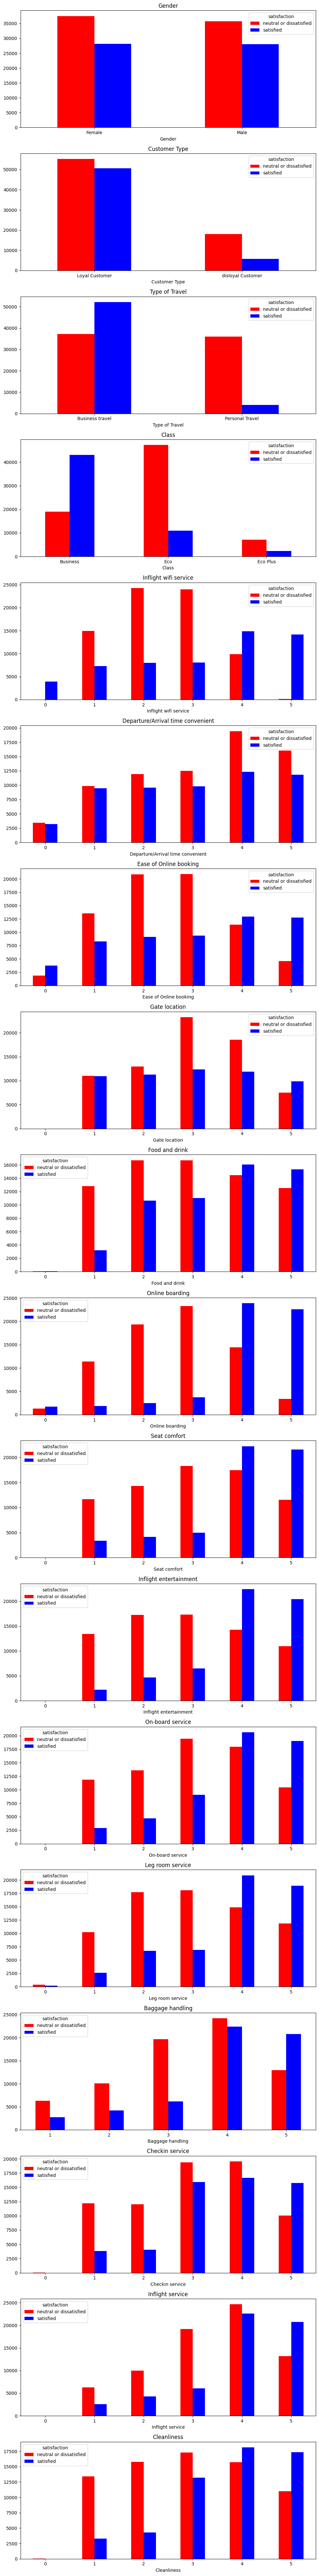

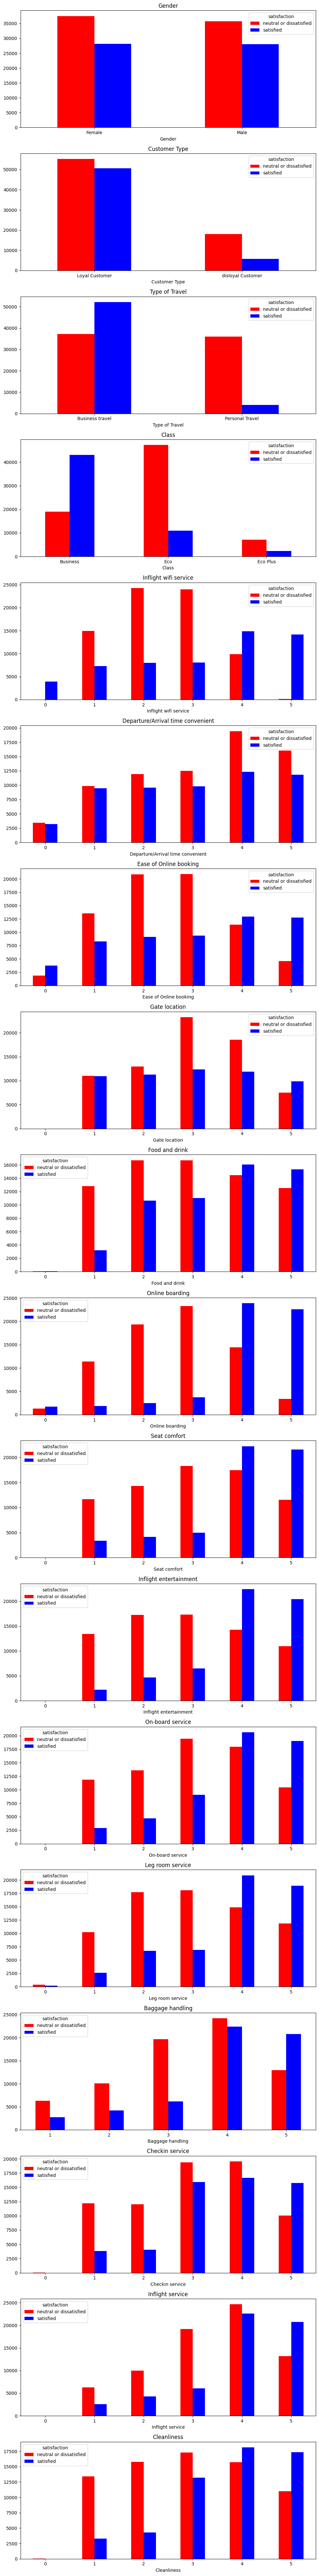

In [ ]:
#Bar plots
import matplotlib.pyplot as plt
#Categorical attributes
CategoricalColsList=["Gender",
                    "Customer Type",
                    "Type of Travel",
                    "Class",
                    "Inflight wifi service",
                    "Departure/Arrival time convenient",
                    "Ease of Online booking",
                    "Gate location",
                    "Food and drink",
                    "Online boarding",
                    "Seat comfort",
                    "Inflight entertainment",
                    "On-board service",
                    "Leg room service",
                    "Baggage handling",
                    "Checkin service",
                    "Inflight service",
                    "Cleanliness"]

fig, PlotCanvas = plt.subplots(nrows=len(CategoricalColsList), ncols=1, figsize=(10, 80))
#Creating Grouped bar plots for each categorical predictor vs the Target Variable "Clicked"
for CategoricalCol, i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    CrossTabResult = pd.crosstab(index=AirlineData[CategoricalCol], columns=AirlineData['satisfaction'])
    CrossTabResult.plot.bar(color=['red', 'blue'], ax=PlotCanvas[i])

    PlotCanvas[i].tick_params(axis='x', rotation=0)
    # Add a title for each subplot
    PlotCanvas[i].set_title(CategoricalCol)

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def PlotCatStackBar(n1, n2, df):
    #create stack barplot
    cross_tab = pd.crosstab(df[n1], df[n2])
    ax = cross_tab.plot(kind='bar', stacked=True, figsize=(6, 4))
    # Calculate the percentage of each category within the total for each group
    Percent = cross_tab.div(cross_tab.sum(axis=1), axis=0).values.T.flatten()

    plt.xlabel(n1)
    plt.ylabel('Count')
    ax.legend(title=n2)
    # Add percentages to the plot
    for i, p in enumerate(ax.patches):
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        if height != 0:
            percent = Percent[i]
            ax.annotate(f'{percent:.2%} ({height:.0f})', (x + width / 2, y + height + 0.01), ha='center', fontsize=10)

    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    plt.show()

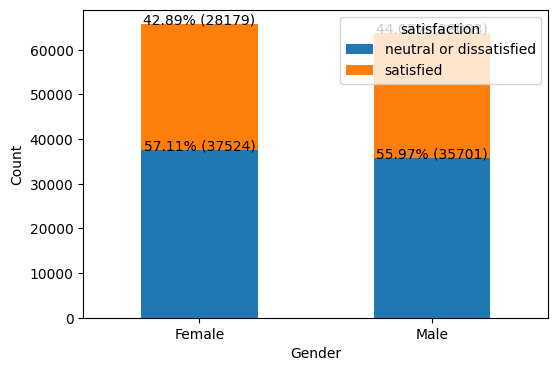

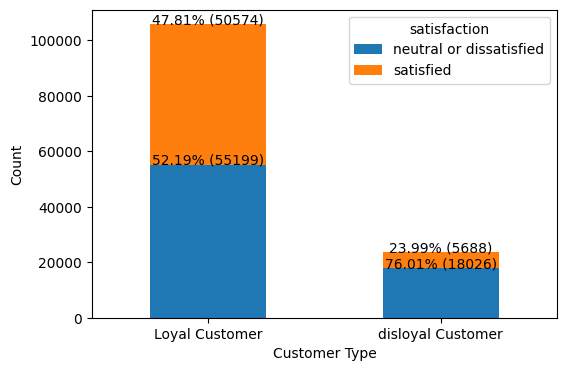

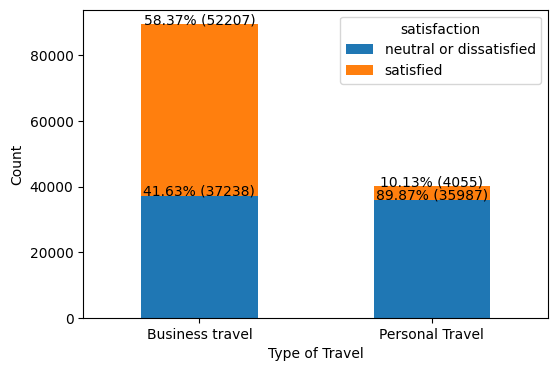

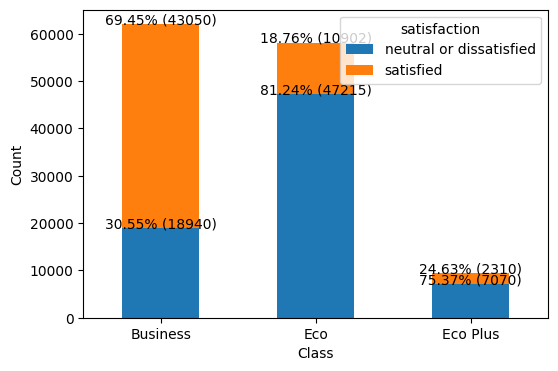

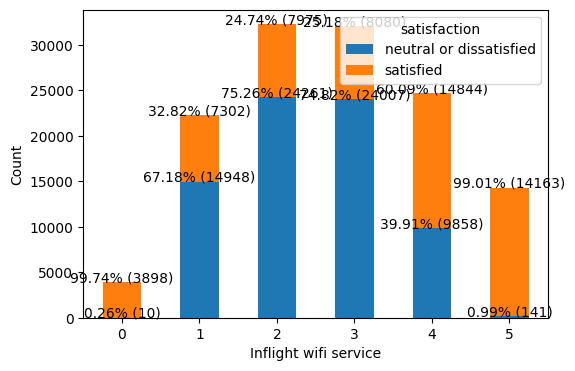

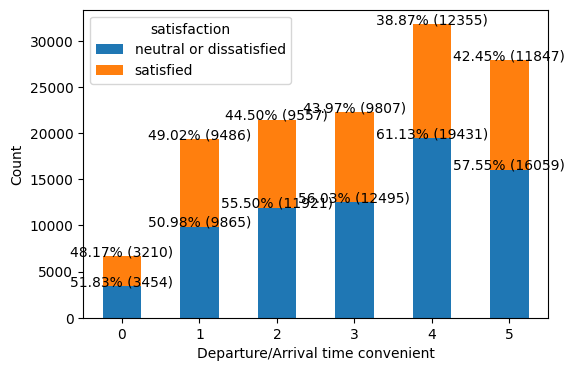

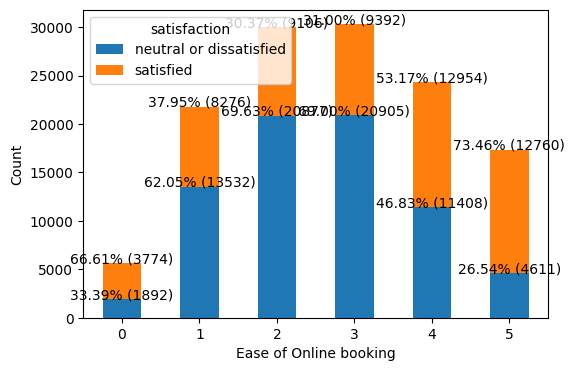

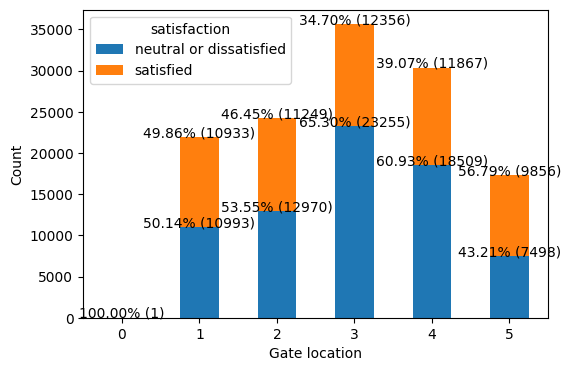

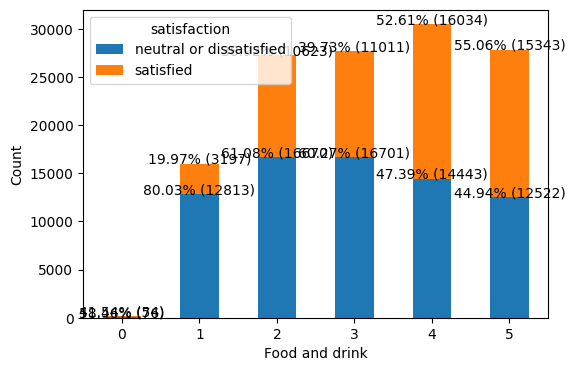

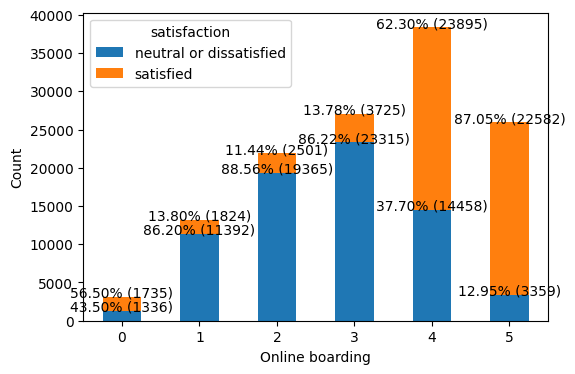

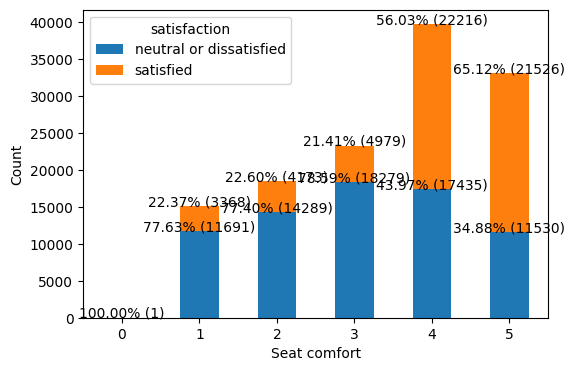

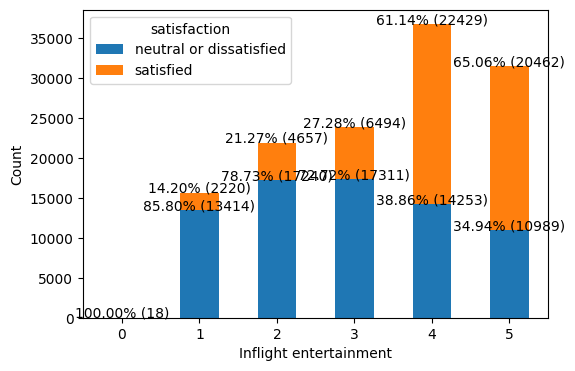

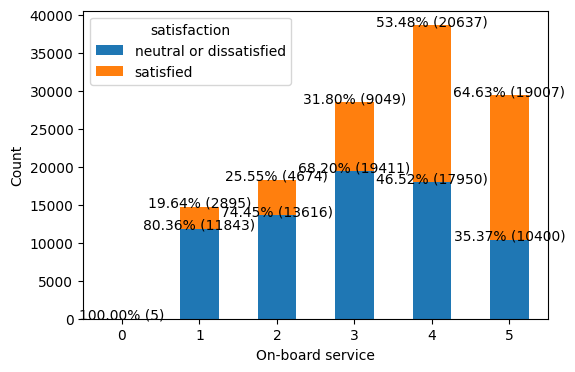

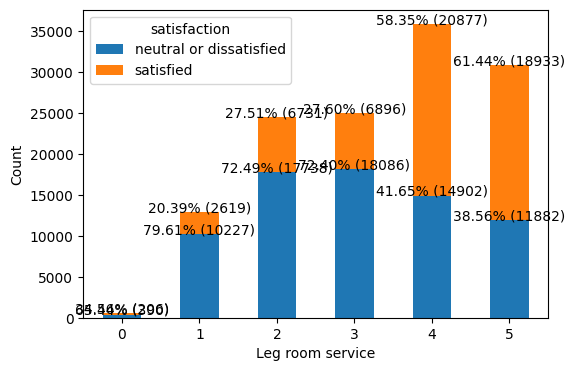

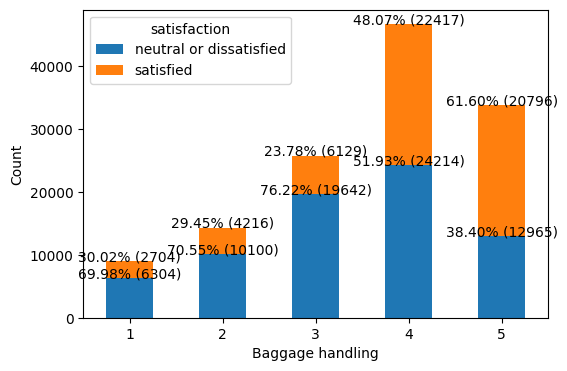

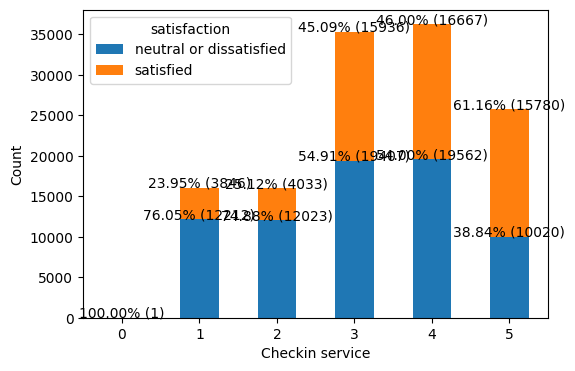

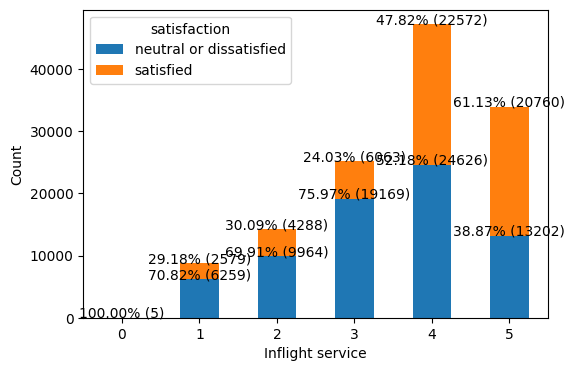

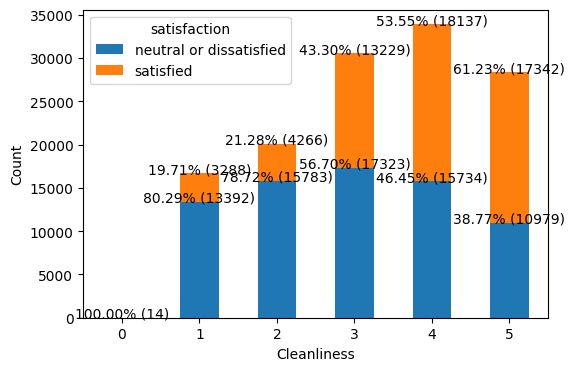

In [ ]:
#columns for the bar plots
df = AirlineData[["satisfaction",
                  "Gender",
                  "Customer Type",
                  "Type of Travel",
                  "Class",
                  "Inflight wifi service",
                  "Departure/Arrival time convenient",
                  "Ease of Online booking",
                  "Gate location",
                  "Food and drink",
                  "Online boarding",
                  "Seat comfort",
                  "Inflight entertainment",
                  "On-board service",
                  "Leg room service",
                  "Baggage handling",
                  "Checkin service",
                  "Inflight service",
                  "Cleanliness"]]

#create stacked bar plots
for c in df.columns[1:]:
    PlotCatStackBar(c, "satisfaction", df)

#### **Grouped Bar charts Interpretation**
Look at the Gender Vs Saticfaction plot. The satisfied vs Not-eutral or dissatisfied ratio for each gender is similar, it means Gender does not affect the Saticfaction!. Hence, these two variables are not correlated.

**Selected Categorical Variables:**

* **Gender:** Selected
* **Customer Type:** Selected
* **Type of Travel:** Selected
* **Class:** Selected
* **Inflight wifi service:** Selected
* **Departure/Arrival time convenient:** Selected
* **Ease of Online booking:** Selected
* **Gate location:** Selected
* **Food and drink:** Selected
* **Online boarding:** Selected
* **Seat comfort:** Selected
* **Inflight entertainment:** Selected
* **On-board service:** Selected
* **Leg room service:** Selected
* **Baggage handling:** Selected
* **Checkin service:** Selected
* **Inflight service:** Selected
* **Cleanliness:** Selected


### **8.2.2 Statistical Feature Selection**

In [ ]:
#Chi-Sq function
def FunctionChisq(inpData, TargetVariable, CategoricalVariablesList):
    from scipy.stats import chi2_contingency

    SelectedPredictors=[]

    for predictor in CategoricalVariablesList:
        CrossTabResult=pd.crosstab(index=inpData[TargetVariable], columns=inpData[predictor])
        ChiSqResult = chi2_contingency(CrossTabResult)

        #If the ChiSq P-Value is <0.05, that means we reject H0
        if (ChiSqResult[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])

    return(SelectedPredictors)

In [ ]:
#Categorical attributes
CategoricalVariables=["Gender",
                    "Customer Type",
                    "Type of Travel",
                    "Class",
                    "Inflight wifi service",
                    "Departure/Arrival time convenient",
                    "Ease of Online booking",
                    "Gate location",
                    "Food and drink",
                    "Online boarding",
                    "Seat comfort",
                    "Inflight entertainment",
                    "On-board service",
                    "Leg room service",
                    "Baggage handling",
                    "Checkin service",
                    "Inflight service",
                    "Cleanliness"]

#Calling the function
FunctionChisq(inpData=AirlineData,
              TargetVariable='satisfaction',
              CategoricalVariablesList= CategoricalVariables)

Gender is correlated with satisfaction | P-Value: 3.608854694610591e-05
Customer Type is correlated with satisfaction | P-Value: 0.0
Type of Travel is correlated with satisfaction | P-Value: 0.0
Class is correlated with satisfaction | P-Value: 0.0
Inflight wifi service is correlated with satisfaction | P-Value: 0.0
Departure/Arrival time convenient is correlated with satisfaction | P-Value: 2.473802119547831e-127
Ease of Online booking is correlated with satisfaction | P-Value: 0.0
Gate location is correlated with satisfaction | P-Value: 0.0
Food and drink is correlated with satisfaction | P-Value: 0.0
Online boarding is correlated with satisfaction | P-Value: 0.0
Seat comfort is correlated with satisfaction | P-Value: 0.0
Inflight entertainment is correlated with satisfaction | P-Value: 0.0
On-board service is correlated with satisfaction | P-Value: 0.0
Leg room service is correlated with satisfaction | P-Value: 0.0
Baggage handling is correlated with satisfaction | P-Value: 0.0
Check

['Gender',
 'Customer Type',
 'Type of Travel',
 'Class',
 'Inflight wifi service',
 'Departure/Arrival time convenient',
 'Ease of Online booking',
 'Gate location',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness']

### **Interpretation**
Based on the results of Chi-Square test, below categorical columns are selected as predictors for Machine Learning

**Final selected Categorical columns from Visual exploration and Statistical Feature Selection:**

"Gender"(**doubt**),
"Customer Type",
"Type of Travel",
"Class",
"Inflight wifi service",
"Departure/Arrival time convenient"(**doubt**),
"Ease of Online booking",
"Gate location",
"Food and drink",
"Online boarding",
"Seat comfort",
"Inflight entertainment",
"On-board service",
"Leg room service",
"Baggage handling",
"Checkin service",
"Inflight service" and
"Cleanliness"



# **9. Selecting final predictors for Machine Learning summary**

We are going to conduct the first experiment with all selected attributes and then proceed to the second experiment with the doubted attributes.

In [ ]:
SelectedColumns = AirlineData.columns
# Selecting final columns
DataForML=AirlineData[SelectedColumns]
DataForML.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


# **10. Data Pre-processing for Machine Learning**



Due to the wide range of values for each variable in the dataset, it is necessary to normalize the values of each variable to be within the range of 0-1, or perform normalization.

**Standardization/Normalization of data**

In [ ]:
#min-max normalization continuous variables using sklearn
from sklearn import preprocessing
MinMaxScaler = preprocessing.MinMaxScaler()

#continuous attributes
ContinuousVars=["Age",
                  "Flight Distance",
                  "Departure Delay in Minutes",
                  "Arrival Delay in Minutes",
                  "Inflight wifi service",
                  "Departure/Arrival time convenient",
                  "Ease of Online booking",
                  "Gate location",
                  "Food and drink",
                  "Online boarding",
                  "Seat comfort",
                  "Inflight entertainment",
                  "On-board service",
                  "Leg room service",
                  "Baggage handling",
                  "Checkin service",
                  "Inflight service",
                  "Cleanliness"
                ]

#scaling the continuous attributes
for i in ContinuousVars:
    DataForML[i]=MinMaxScaler.fit_transform(DataForML[[i]])

DataForML.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000
mean,0.415753,0.234089,0.545709,0.611470,0.551357,0.595382,0.640937,0.650544,0.688318,0.671613,0.676641,0.670216,0.657971,0.661248,0.728475,0.657244,0.009198,0.009527
std,0.193815,0.201446,0.265847,0.305357,0.280332,0.255701,0.265981,0.270130,0.263834,0.266830,0.257406,0.263226,0.295021,0.253229,0.235323,0.262725,0.023827,0.024284
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.256410,0.077342,0.400000,0.400000,0.400000,0.400000,0.400000,0.400000,0.400000,0.400000,0.400000,0.400000,0.500000,0.600000,0.600000,0.400000,0.000000,0.000000
50%,0.423077,0.164176,0.600000,0.600000,0.600000,0.600000,0.600000,0.600000,0.800000,0.800000,0.800000,0.800000,0.750000,0.600000,0.800000,0.600000,0.000000,0.000000
75%,0.564103,0.345921,0.800000,0.800000,0.800000,0.800000,0.800000,0.800000,1.000000,0.800000,0.800000,0.800000,1.000000,0.800000,1.000000,0.800000,0.007538,0.008207
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Performing One-hot with 'Gender', 'Customer Type', 'Type of Travel'and 'Class'

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import pandas as pd

#One-hot encode the 'Gender', 'Customer Type', 'Type of Travel'and 'Class' columns
DataForML_encoded = pd.get_dummies(DataForML, columns=['Gender', 'Customer Type', 'Type of Travel', 'Class'], drop_first=True)


# **11. Model construction**

**Splitting the data into Training and Testing sample**

We use 70% of data is used as Training data on which the model is built and the rest 30% is used as Tesing data which is randomly selected.

In [ ]:
#Split the data into training set 70% and testing set 30%
X_train, X_test, y_train, y_test = train_test_split(
    DataForML_encoded.drop(labels=['satisfaction'], axis=1),
    DataForML_encoded['satisfaction'],
    test_size=0.3,
    random_state=0
)

The data have simple structure.So, we choose decision tree which is basic clasification model.Moreover, the data have many attributes so we might implement PCA, if it give better performance.

## **11.1 PCA implementation**

Decision tree without PCA.

In [ ]:
#Use the Decision Tree model
model = DecisionTreeClassifier(max_depth=10, random_state=0)
model.fit(X_train, y_train)

#Evaluate train set performance
y_pred = model.predict(X_train)
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

#Evaluate the model
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

Decision tree with PCA.

In [ ]:
# use PCA to reduce dimension with 10 components
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

decision_tree = DecisionTreeClassifier()

#Train the model using the training sets
decision_tree.fit(X_train, y_train)

#Make predictions using the testing set
y_pred = decision_tree.predict(X_test)


print("Classification Report:")
print(classification_report(y_test, y_pred))
print("\n")

## **11.2 Deleting Doubted attributes**

1.Departure Delay in Minutes

In [ ]:
#Split the data into training set 70% and testing set 30%
X_train, X_test, y_train, y_test = train_test_split(
    DataForML_encoded.drop(labels=['satisfaction','Departure Delay in Minutes'], axis=1),
    DataForML_encoded['satisfaction'],
    test_size=0.3,
    random_state=0
)

#Use the Decision Tree model
model = DecisionTreeClassifier(max_depth=10, random_state=0)
model.fit(X_train, y_train)

#Evaluate train set performance
y_pred = model.predict(X_train)
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

#Evaluate the model
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

2.Departure/Arrival time convenient

In [ ]:
#Split the data into training set 70% and testing set 30%
X_train, X_test, y_train, y_test = train_test_split(
    DataForML_encoded.drop(labels=['satisfaction','Departure/Arrival time convenient'], axis=1),
    DataForML_encoded['satisfaction'],
    test_size=0.3,
    random_state=0
)

#Use the Decision Tree model
model = DecisionTreeClassifier(max_depth=10, random_state=0)
model.fit(X_train, y_train)

#Evaluate train set performance
y_pred = model.predict(X_train)
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

#Evaluate the model
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

3.Gender

In [ ]:
#Split the data into training set 70% and testing set 30%
X_train, X_test, y_train, y_test = train_test_split(
    DataForML_encoded.drop(labels=['satisfaction','Gender_Male'], axis=1),
    DataForML_encoded['satisfaction'],
    test_size=0.3,
    random_state=0
)

#Use the Decision Tree model
model = DecisionTreeClassifier(max_depth=10, random_state=0)
model.fit(X_train, y_train)

#Evaluate train set performance
y_pred = model.predict(X_train)
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

#Evaluate the model
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

## **11.3 Feature Important**

In [ ]:
#use feature importance and show the top 10 important features
import pandas as pd
import matplotlib.pyplot as plt

#Create a DataFrame with the feature names and their importance
feature_imp = pd.DataFrame(zip(DataForML_encoded.drop(labels=['satisfaction'], axis=1).columns, model.feature_importances_),
                           columns=['Feature', 'Importance'])

#Sort the features based on their importance
feature_imp.sort_values(by=['Importance'], ascending=False, inplace=True)

#Select the 10 most important features
top_10_imp_features = feature_imp.head(10)

#Plot the 10 most important features in a horizontal bar chart
top_10_imp_features.plot(kind='barh', x='Feature', y='Importance', figsize=(12, 6), legend=False)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 important features')
plt.show()


In [ ]:
#use Top 3 important features to build the model
#Split the data into training set 70% and testing set 30%
X_train, X_test, y_train, y_test = train_test_split(
    DataForML_encoded[['Type of Travel_Personal Travel', 'Inflight wifi service', 'Online boarding','Inflight entertainment','Customer Type_disloyal Customer']],
    DataForML_encoded['satisfaction'],
    test_size=0.3,
    random_state=0
)

#Use the Decision Tree model
model = DecisionTreeClassifier(max_depth=10, random_state=0)
model.fit(X_train, y_train)

#Evaluate train set performance
y_pred = model.predict(X_train)
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

#Evaluate the model
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

## **11.4 use grid search to find best parameter**

In [ ]:
from sklearn.model_selection import GridSearchCV

#Create the parameter grid based on the results of random search
param_grid = {
    'max_depth': [5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 5, 10]
}

#Create a based model
model = DecisionTreeClassifier(random_state=0)

#Instantiate the grid search model
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

#Fit the grid search to the data
grid_search.fit(X_train, y_train)

#Find the best parameters
grid_search.best_params_

Fitting 3 folds for each of 36 candidates, totalling 108 fits


{'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 5}

In [ ]:
#use decision tree with best parameter
from sklearn.tree import DecisionTreeClassifier

#Use the Decision Tree model
model = DecisionTreeClassifier(max_depth=15, min_samples_leaf=1, min_samples_split=5, random_state=0)
model.fit(X_train, y_train)

#Evaluate train set performance
y_pred = model.predict(X_train)
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

#Evaluate test set performance
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[50277   934]
 [ 1743 37686]]
                         precision    recall  f1-score   support

neutral or dissatisfied       0.97      0.98      0.97     51211
              satisfied       0.98      0.96      0.97     39429

               accuracy                           0.97     90640
              macro avg       0.97      0.97      0.97     90640
           weighted avg       0.97      0.97      0.97     90640

[[21248   766]
 [ 1117 15716]]
                         precision    recall  f1-score   support

neutral or dissatisfied       0.95      0.97      0.96     22014
              satisfied       0.95      0.93      0.94     16833

               accuracy                           0.95     38847
              macro avg       0.95      0.95      0.95     38847
           weighted avg       0.95      0.95      0.95     38847



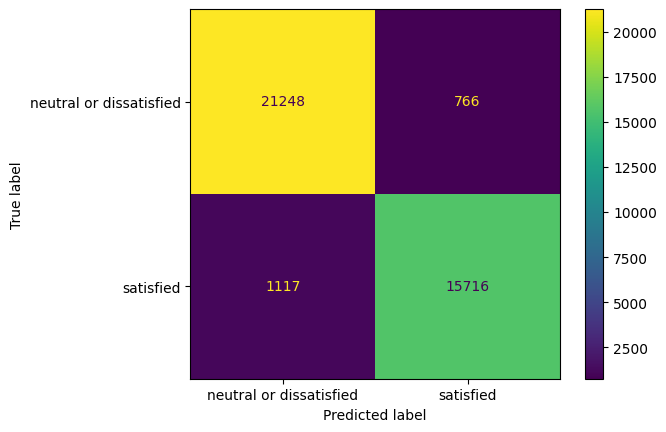

In [ ]:
#Plot confusion matrix of test set using ConfusionMatrixDisplay
from sklearn.metrics import ConfusionMatrixDisplay

#Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()


In [ ]:
#use export_text to visualize decision tree
from sklearn.tree import export_text
print(export_text(model, feature_names=list(DataForML_encoded.drop(labels=['satisfaction','Departure Delay in Minutes'], axis=1).columns)))


|--- Online boarding <= 0.70
|   |--- Inflight wifi service <= 0.10
|   |   |--- Cleanliness <= 0.10
|   |   |   |--- class: neutral or dissatisfied
|   |   |--- Cleanliness >  0.10
|   |   |   |--- class: satisfied
|   |--- Inflight wifi service >  0.10
|   |   |--- Inflight wifi service <= 0.70
|   |   |   |--- Class_Eco <= 0.50
|   |   |   |   |--- Inflight entertainment <= 0.70
|   |   |   |   |   |--- Cleanliness <= 0.90
|   |   |   |   |   |   |--- Gate location <= 0.70
|   |   |   |   |   |   |   |--- Checkin service <= 0.90
|   |   |   |   |   |   |   |   |--- Seat comfort <= 0.90
|   |   |   |   |   |   |   |   |   |--- Inflight service <= 0.90
|   |   |   |   |   |   |   |   |   |   |--- Baggage handling <= 0.88
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |   |--- Baggage handling >  0.88
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |--- Inf

# **12. Results Analysis**

**Experiment analysis** <br>
1.In this work, PCA can reduce data dimension.But, it also reduce the performance.So, we decided to not impliment PCA.<br>
2.The performance of 11.2 show that 'depature delay', 'Departure/Arrival time convenient'and 'Gender' have less effect to the model so if input data do not have this attribute , this model still reliable to use.<br>
3.After using only top 5 important feauture, the performance decreased only slightly.So, if the data set have more attribute causing long runtime,we can use only these 5 attributes to reduce runtime and lost only slightly performance

**Performance analysis**<br>
1.The model is not overfit because the train set and test set have similar performance.<br>
2.The decision tree model without PCA give the best performance. After tunning hyper parameter by grid search, the accuracy is about 0.95 which is good enough to predict target class.<br>
3.The model's performance is relatively high with accuracy, precision, and recall all at 0.95. <br>
4.Since the model has equal precision and recall, both false negatives and false positives affect the model's performance equally.

